In [3]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = r"C:\Users\manab\Downloads\archive (16).zip"

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
!pip install opencv-python

In [28]:

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image 
from sklearn.model_selection import train_test_split

In [29]:
with_mask_files = os.listdir(r"C:\Users\manab\Downloads\DEEP LEARNING PROJECTS\data\with_mask")
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [30]:
without_mask_files = os.listdir(r"C:\Users\manab\Downloads\DEEP LEARNING PROJECTS\data\without_mask")
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


In [32]:
print ('Number of with mask images',len(with_mask_files))
print ('Number of without mask images',len(without_mask_files))

Number of with mask images 3725
Number of without mask images 3828


# Creating labels for the two classes of images

with mask---->1
without mask---->0

In [33]:
# create the labels

with_mask_labels=[1]*3725

without_mask_labels=[0]*3828

In [34]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [35]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [36]:
labels=with_mask_labels+without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])


7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


# Displaying the images

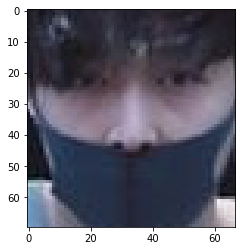

In [37]:
# displaying with mask image
img = mpimg.imread(r"C:\Users\manab\Downloads\DEEP LEARNING PROJECTS\data\with_mask\with_mask_996.jpg")
imgplot = plt.imshow(img)
plt.show()


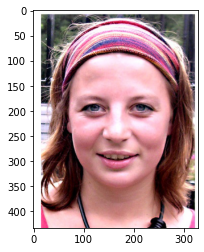

In [38]:
# displaying without mask image
img = mpimg.imread(r"C:\Users\manab\Downloads\DEEP LEARNING PROJECTS\data\without_mask\without_mask_996.jpg")
imgplot = plt.imshow(img)
plt.show()

# Image processing

# 1 Resize the images

# 2 Convert the images into numpy array

In [58]:
from PIL import Image
import os

# Assuming without_mask_path contains the path to your images without masks
without_mask_path = r"C:\Users\manab\Downloads\DEEP LEARNING PROJECTS\data\without_mask"
without_mask_files = os.listdir(without_mask_path)

without_mask_data = []

for img_file in without_mask_files:
    img_path = os.path.join(without_mask_path, img_file)
    img = Image.open(img_path)
    img = img.resize((128, 128))
    img = img.convert('RGB')
    img = np.array(img)
    without_mask_data.append(img)
    
    
with_mask_path = r"C:\Users\manab\Downloads\DEEP LEARNING PROJECTS\data\with_mask"
with_mask_files = os.listdir(with_mask_path)

with_mask_data = []

for img_file in with_mask_files:
    img_path = os.path.join(with_mask_path, img_file)
    img = Image.open(img_path)
    img = img.resize((128, 128))
    img = img.convert('RGB')
    img = np.array(img)
    with_mask_data.append(img)
        

In [59]:
len(with_mask_data)

3725

In [60]:
len(without_mask_data)

3828

In [61]:
data=with_mask_data+without_mask_data

In [62]:
len(data)

7553

In [63]:
type(data)

list

In [64]:
data[0]

array([[[50, 58, 31],
        [46, 54, 34],
        [56, 59, 42],
        ...,
        [26, 32, 25],
        [29, 33, 18],
        [34, 40, 16]],

       [[47, 55, 30],
        [49, 57, 37],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [38, 42, 31],
        [31, 41, 22]],

       [[52, 58, 37],
        [50, 59, 38],
        [59, 64, 36],
        ...,
        [45, 44, 30],
        [29, 35, 28],
        [20, 30, 17]],

       ...,

       [[63, 72, 37],
        [66, 76, 41],
        [74, 84, 50],
        ...,
        [ 5,  4,  0],
        [20, 19, 15],
        [17, 17, 12]],

       [[59, 71, 34],
        [60, 70, 39],
        [68, 76, 50],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 29],
        [54, 64, 37],
        [57, 63, 43],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [20, 12, 13]]], dtype=uint8)

In [65]:
 type(data[0])

numpy.ndarray

In [66]:
data[0].shape

(128, 128, 3)

In [67]:
# converting image list and labels list to numpy array

x=np.array(data)
y=np.array(labels)

In [68]:
type(x)

numpy.ndarray

In [69]:
type(y)

numpy.ndarray

In [70]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


# Train Test Split

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [72]:
print(x.shape,x_train.shape,x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [73]:
# Scaling your data

x_train_scaled=x_train/255
x_test_scaled=x_test/255

# Building a Convolutional Neural Network(CNN)

In [76]:
import tensorflow as tf
from tensorflow import keras

In [81]:
num_of_classes=2

model=keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))





In [82]:
# compile the neural network

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [83]:
# Training the neural network

history=model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=5)

Epoch 1/5


170/170 [==============================] - 98s 220ms/step - loss: 0.4331 - acc: 0.8163 - val_loss: 0.2730 - val_acc: 0.8909
Epoch 2/5
170/170 [==============================] - 32s 189ms/step - loss: 0.2908 - acc: 0.8834 - val_loss: 0.2210 - val_acc: 0.9124
Epoch 3/5
170/170 [==============================] - 33s 194ms/step - loss: 0.2448 - acc: 0.9018 - val_loss: 0.2390 - val_acc: 0.9041
Epoch 4/5
170/170 [==============================] - 33s 191ms/step - loss: 0.2030 - acc: 0.9156 - val_loss: 0.1815 - val_acc: 0.9355
Epoch 5/5
170/170 [==============================] - 33s 192ms/step - loss: 0.1724 - acc: 0.9308 - val_loss: 0.2010 - val_acc: 0.9207


In [85]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 3s 53ms/step - loss: 0.1952 - acc: 0.9219
Test Accuracy = 0.9219059944152832


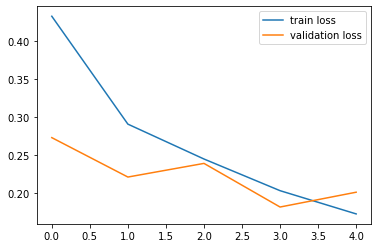

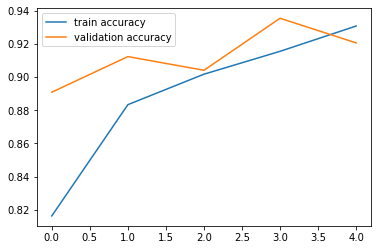

In [86]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)

# Display the input image using Matplotlib
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis labels
plt.show()

# Resize and scale the input image for prediction
input_image_resized = cv2.resize(input_image, (128, 128))
input_image_scaled = input_image_resized / 255.0
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

# Assuming 'model' is already loaded and ready for inference
input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
    print('The person in the image is wearing a mask')
else:
    print('The person in the image is not wearing a mask')